# Part 1: Chicago Divvy Bike

## 1.1. Exploratory Data Analysis

In this section, we will be taking a first look at the raw data and determining how it needs to be cleaned/pre-processed to generate good descriptive statistics and prepare for feeding a predictive model.

In [1]:
import pandas as pd
import numpy as np
import missingno

In [2]:
pwd

'/Users/lucas.mazzottiibm.com/Box Sync/IBM - Box Sync/Training & Onboarding/DEVUP/DevUp2.1'

In [3]:
cd Divvy Data

/Users/lucas.mazzottiibm.com/Box Sync/IBM - Box Sync/Training & Onboarding/DEVUP/DevUp2.1/Divvy Data


In [4]:
#first, we'll import the raw data

data_1 = pd.read_csv('Divvy_Trips_2017_Q1.csv')
data_2 = pd.read_csv('Divvy_Trips_2017_Q2.csv')
data_3 = pd.read_csv('Divvy_Trips_2017_Q3.csv')
data_4 = pd.read_csv('Divvy_Trips_2017_Q4.csv')

In [5]:
#next, check to ensure the column names in all the files are the same before concatenating

print(data_1.columns == data_2.columns)
print(data_1.columns == data_3.columns)
print(data_1.columns == data_4.columns)

[ True  True  True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True]


In [6]:
#now concatenate into a single dataframe
data = pd.concat([data_1, data_2, data_3, data_4], ignore_index=True)

In [7]:
#next, an initial look at the shape of the data
data.shape

(3829014, 12)

In [8]:
#next, an initial look at first few rows of data
data.head(10)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,13518905,3/31/2017 23:59:07,4/1/2017 00:13:24,5292,857,66,Clinton St & Lake St,171,May St & Cullerton St,Subscriber,Male,1989.0
1,13518904,3/31/2017 23:56:25,4/1/2017 00:00:21,4408,236,199,Wabash Ave & Grand Ave,26,McClurg Ct & Illinois St,Subscriber,Male,1990.0
2,13518903,3/31/2017 23:55:33,4/1/2017 00:01:21,696,348,520,Greenview Ave & Jarvis Ave,432,Clark St & Lunt Ave,Subscriber,Female,1979.0
3,13518902,3/31/2017 23:54:46,3/31/2017 23:59:34,4915,288,110,Dearborn St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1985.0
4,13518901,3/31/2017 23:53:33,4/1/2017 00:00:28,4247,415,327,Sheffield Ave & Webster Ave,331,Halsted St & Blackhawk St (*),Subscriber,Female,1989.0
5,13518900,3/31/2017 23:51:17,3/31/2017 23:55:19,3536,242,143,Sedgwick St & Webster Ave,289,Wells St & Concord Ln,Subscriber,Male,1988.0
6,13518899,3/31/2017 23:51:16,3/31/2017 23:57:17,5111,361,81,Daley Center Plaza,41,Federal St & Polk St,Subscriber,Male,1987.0
7,13518898,3/31/2017 23:50:26,3/31/2017 23:56:20,1579,354,56,Desplaines St & Kinzie St,77,Clinton St & Madison St,Subscriber,Male,1981.0
8,13518897,3/31/2017 23:50:25,3/31/2017 23:55:24,3914,299,210,Ashland Ave & Division St,69,Damen Ave & Pierce Ave,Subscriber,Male,1992.0
9,13518896,3/31/2017 23:49:58,4/1/2017 00:09:31,5455,1173,117,Wilton Ave & Belmont Ave,29,Noble St & Milwaukee Ave,Subscriber,Male,1989.0


In [9]:
#now, some basic statistics on the numerical features
data.describe()

,trip_id,bikeid,tripduration,from_station_id,to_station_id,birthyear
count,3.829014e+06,3.829014e+06,3.829014e+06,3.829014e+06,3.829014e+06,2.992256e+06
mean,1.527218e+07,3.425115e+03,9.556339e+02,1.803509e+02,1.805161e+02,1.981586e+03
std,1.302950e+06,1.861236e+03,1.569451e+03,1.328194e+02,1.329273e+02,1.088278e+01
min,1.297923e+07,1.000000e+00,6.000000e+01,2.000000e+00,2.000000e+00,1.899000e+03
25%,1.416006e+07,1.803000e+03,4.020000e+02,7.400000e+01,7.400000e+01,1.976000e+03
50%,1.527486e+07,3.583000e+03,6.860000e+02,1.560000e+02,1.560000e+02,1.985000e+03
75%,1.639615e+07,5.063000e+03,1.149000e+03,2.680000e+02,2.680000e+02,1.990000e+03
max,1.753670e+07,6.471000e+03,8.633800e+04,6.260000e+02,6.260000e+02,2.017000e+03


From an initial look we can already see there are some problems with the data. For example, the longest bike trip is 8.633e+04 (86,338 seconds or 23.98 hours). The maximum trip length is 30 minutes (1800 seconds) for non-subscribers and 45 minutes (2700 seconds) for subscribers before additional charges are incurred. Perhaps someone lost a bike and left it sitting around all day. We will remove such outliers during preprocessing. 

Additionally, the maximum birth year is 2017 which would unrealistically imply an infant is riding the bike. On the flip side, the minimum birth year is 1899 meaning a 118-year-old is riding the bike - also unrealistic.

In [10]:
#check for duplicate rows of data 
data.duplicated().sum()

11

In [11]:
#drop the duplicate rows of data
data.drop_duplicates(inplace=True)

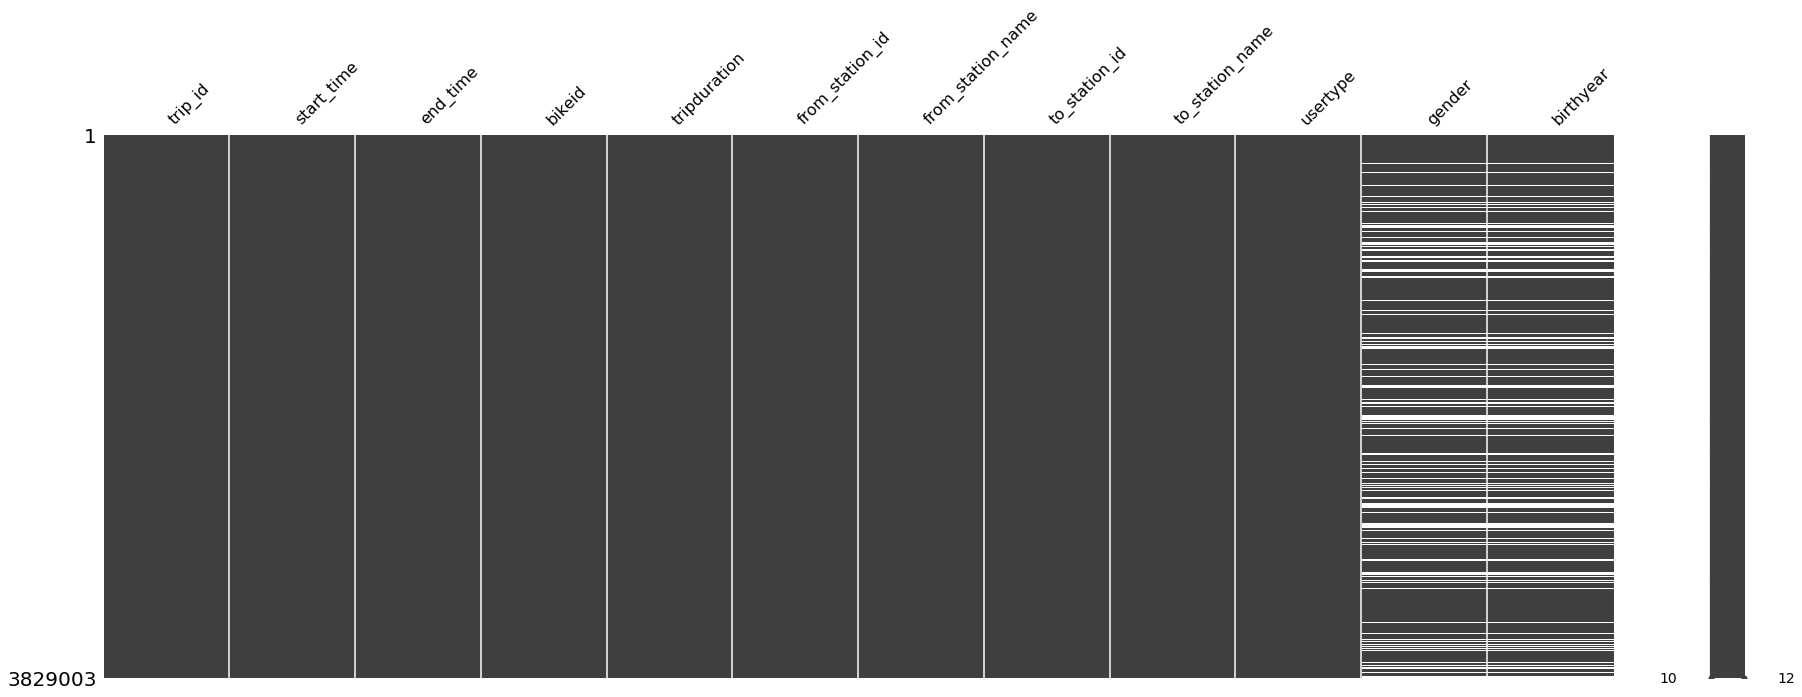

In [12]:
#use missingno to visualize missing data

missingno.matrix(data, figsize=(30,10))

Looks like the 'gender' and 'birthyear' columns are missing data. Let's quantify how much data is missing both as a percentage and a sum.

In [13]:
#calculate the percentage of missing data in each column
data.isna().mean()

trip_id              0.000000
start_time           0.000000
end_time             0.000000
bikeid               0.000000
tripduration         0.000000
from_station_id      0.000000
from_station_name    0.000000
to_station_id        0.000000
to_station_name      0.000000
usertype             0.000000
gender               0.218547
birthyear            0.218529
dtype: float64

In [14]:
#calculate the number of missing values in each column
data.isna().sum()

trip_id                   0
start_time                0
end_time                  0
bikeid                    0
tripduration              0
from_station_id           0
from_station_name         0
to_station_id             0
to_station_name           0
usertype                  0
gender               836816
birthyear            836747
dtype: int64

A reasonable amount of data (21.8%) is missing from the 'age' and 'gender' columns. Luckily, the first three statistics the Mayor wants answered should not be affected by these missing values: 

*1)	Top 5 stations with the most starts (showing # of starts)*

*2)	Trip duration by user type*

*3)	Most popular trips based on start station and stop station*

So we won't drop or impute values for the missing data yet. However, we will want to remove extreme outliers to get better results.

In [15]:
#first, store the number of rows as numrows to compare against our newnumrows after data cleaning
numrows = data.shape[0]

In [16]:
#create a new column called 'age' using 2017 - birthyear
data['age'] = 2017 - data['birthyear']

We could remove outliers for 'tripduration' based on Z score, but instead I'll just intuitively/arbitrarily select minima and maxima these numerical columns. My reasoning for this is that a 2-hour ride, for example, may be considered an outlier by this measure, but it is still valid data that we should include as it's conceivable that someone could take a 2-hr bike ride through the city for leisure. 

For now, I will exclude any trips that lasted longer than 3 hours (10800 seconds). 

Removing values that fall outside of this maximum should not represent a significant percentage of the overall dataset.

In [17]:
#create new dataframe to use for measuring our first three statistics from the prompt
data2 = data.copy()

In [18]:
#remove any rows of data with a 'tripduration' greater than 3 hours (10800 seconds)
data2 = data2[data2['tripduration'] < 10800]

In [19]:
#show the new data2 dataframe
data2.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age
0,13518905,3/31/2017 23:59:07,4/1/2017 00:13:24,5292,857,66,Clinton St & Lake St,171,May St & Cullerton St,Subscriber,Male,1989.0,28.0
1,13518904,3/31/2017 23:56:25,4/1/2017 00:00:21,4408,236,199,Wabash Ave & Grand Ave,26,McClurg Ct & Illinois St,Subscriber,Male,1990.0,27.0
2,13518903,3/31/2017 23:55:33,4/1/2017 00:01:21,696,348,520,Greenview Ave & Jarvis Ave,432,Clark St & Lunt Ave,Subscriber,Female,1979.0,38.0
3,13518902,3/31/2017 23:54:46,3/31/2017 23:59:34,4915,288,110,Dearborn St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1985.0,32.0
4,13518901,3/31/2017 23:53:33,4/1/2017 00:00:28,4247,415,327,Sheffield Ave & Webster Ave,331,Halsted St & Blackhawk St (*),Subscriber,Female,1989.0,28.0


In [20]:
#store the new number of rows as newnumrows
newnumrows = data2.shape[0]

In [21]:
#determine how many rows were removed based on our tripduration < 10800 seconds condition
print(numrows - newnumrows, "rows removed")

7587 rows removed


## 1.2 Visualization of Data Stats

Now to determine the first stat: 
### 1.2.1	Top 5 stations with the most starts (showing # of starts)

In [22]:
#create a new dataframe with just the top 5 from_station_name values and the number of instances they appear
stationCount = data2['from_station_name'].value_counts().to_frame().reset_index()

In [23]:
#rename the 'index' column to 'station' and the 'from_station_name' column to 'count' for readability
stationCount.rename(columns={'index':'Origin', 'from_station_name':'No. of Trips'}, inplace = True)

In [24]:
#import Seaborn for visualization
import seaborn as sns

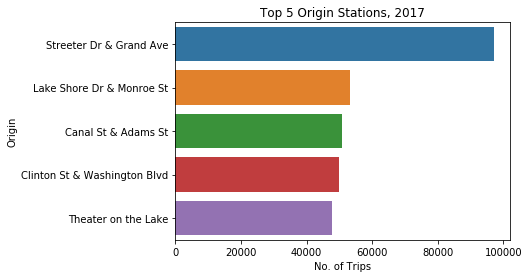

In [25]:
topStations = sns.barplot(data = stationCount[0:5][:], x = "No. of Trips", y ="Origin").set_title("Top 5 Origin Stations, 2017")

This chart shows us thata the Streeter Dr & Grand Ave bike station was by far the most popular origin for Divvy Bike trips in 2017.

### 1.2.2	Trip duration by user type

In [26]:
#create a new dataframe with the mean and count of tripduration for each usertype
userStat = data2.groupby(['usertype'])['tripduration'].agg(['mean','count']).reset_index()

In [27]:
#convert the mean seconds to mean minutes for readability
userStat['mean'] = userStat['mean'] / 60

In [28]:
#rename columns for readabiliy
userStat.rename(columns={'mean':'Average Trip (Minutes)', 'usertype':'User Type'}, inplace=True)

In [29]:
userStat

,User Type,Average Trip (Minutes),count
0,Customer,28.447783,830628
1,Dependent,12.530952,7
2,Subscriber,11.482918,2990781


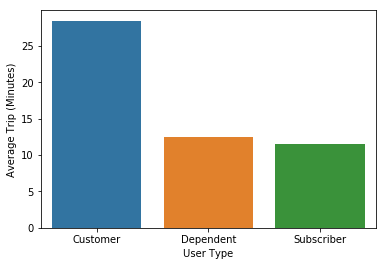

In [30]:
userplot = sns.barplot(data = userStat, x='User Type', y='Average Trip (Minutes)')

This chart shows us that on average, Customers (pay-per-ride riders) take trips that are around 28 minutes while Subscribers take average trips of 11 minutes. 

It's also important to note that there are only 7 samples of "Dependent" users so our average trip length of 12.5 minutes is not significant information for that user type.

### 1.2.3 Most popular trips based on start station and stop station

In [31]:
#create a new dataframe that counts the number of trips from each start station to each stop station
poptrips = data.groupby(['from_station_name', 'to_station_name'])['from_station_name'].count().to_frame()

In [32]:
#rename index + columns to read better and ensure the index and columns don't share the same names
poptrips.rename(index=str, columns=({'from_station_name':'No. of Trips'}), inplace=True)

In [33]:
#sort in descending order by the number of trips and reset index
poptrips = poptrips.sort_values('No. of Trips', ascending=False).reset_index()

In [34]:
#create a new column called tripDesc that concatenates the start and stop station names
poptrips['tripDesc'] = poptrips['from_station_name'].map(str) + " to " + poptrips['to_station_name']

Text(0.5,1,'Most Popular Divvy Bike Trips, 2017')

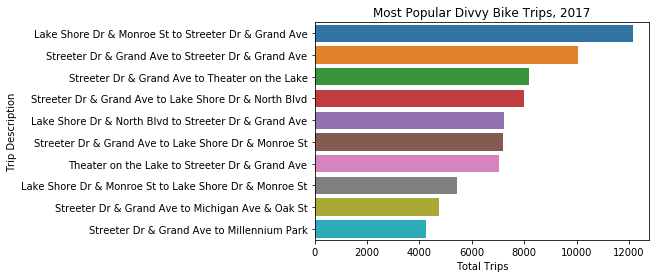

In [35]:
#use seaborn to generate a horizontal bar plot displaying the most popular trips from 2017
bar3 = sns.barplot(x = 'No. of Trips', y = 'tripDesc', data = poptrips.head(10))
bar3.set_ylabel("Trip Description")
bar3.set_xlabel("Total Trips")
bar3.set_title("Most Popular Divvy Bike Trips, 2017")

Here we see a more granular demonstration of the popularity of the Streeter Dr & Grand Ave stop as an origin point. The majority of the most frequented trips start from that stop. 

Interestingly, the second most popular bike trip from 2017 was from Streeter Dr & Grand Ave to Streeter Dr & Grand Ave. My guess is that these are mostly what we might call 'leisure' trips rather than utility trips, and might therefore be longer on average and composed more heavily of Customers relative to other trips. We could explore this idea empirically, but that's outside of the scope of this assessment

### 1.2.4 Rider performance by Gender and Age based on avg trip distance (station to station), median speed (distance traveled / trip duration)

For this question, we'll need to pull in some more data. We don't have a 'distance' feature, which means we'll need to create one. Fortunately, Divvy Bike provides additional files providing more details on the stations including longitude and latitude, which we'll use to calculate the distance between stations. First, we'll read in the data into a new dataframe then join it with our existing dataframe so that each row of trip data has start and end station longitude and latitude among other station information.

In [36]:
import matplotlib.pyplot as plt

In [37]:
station_1 = pd.read_csv('Divvy_Stations_2017_Q1Q2.csv')
station_2 = pd.read_csv('Divvy_Stations_2017_Q3Q4.csv')

In [38]:
#take an initial look at the data
station_1.head()

,id,name,city,latitude,longitude,dpcapacity,online_date
0,456,2112 W Peterson Ave,Chicago,41.991178,-87.683593,15,2/10/2015 14:04:42
1,101,63rd St Beach,Chicago,41.781016,-87.576120,23,7/16/2013 01:27:50
2,109,900 W Harrison St,Chicago,41.874675,-87.650019,19,7/18/2013 16:45:02
3,21,Aberdeen St & Jackson Blvd,Chicago,41.877726,-87.654787,15,6/22/2013 19:07:12
4,80,Aberdeen St & Madison (Monroe) St,Chicago,41.881567,-87.655056,19,6/26/2013 19:00:18


In [39]:
station_2.head()

,id,name,city,latitude,longitude,dpcapacity,online_date,Unnamed: 7
0,2,Buckingham Fountain,Chicago,41.876393,-87.620328,27,6/10/2013 10:43,NaN
1,3,Shedd Aquarium,Chicago,41.867226,-87.615355,55,6/10/2013 10:44,NaN
2,4,Burnham Harbor,Chicago,41.856268,-87.613348,23,6/10/2013 10:46,NaN
3,5,State St & Harrison St,Chicago,41.874053,-87.627716,23,6/10/2013 10:46,NaN
4,6,Dusable Harbor,Chicago,41.885041,-87.612794,39,6/10/2013 11:18,NaN


In [40]:
#check for missing data
print(station_1.isna().sum())
print(station_2.isna().sum())

id             0
name           0
city           0
latitude       0
longitude      0
dpcapacity     0
online_date    0
dtype: int64
id               0
name             0
city             0
latitude         0
longitude        0
dpcapacity       0
online_date      0
Unnamed: 7     585
dtype: int64


In [41]:
#remove the column called 'Unnamed: 7' from station_2
station_2.drop(columns=['Unnamed: 7'], inplace = True)

In [42]:
#concatenate the dataframes into one single dataframe called 'stations'
stations = pd.concat([station_1, station_2], ignore_index=True)

In [43]:
stations.head()

,id,name,city,latitude,longitude,dpcapacity,online_date
0,456,2112 W Peterson Ave,Chicago,41.991178,-87.683593,15,2/10/2015 14:04:42
1,101,63rd St Beach,Chicago,41.781016,-87.576120,23,7/16/2013 01:27:50
2,109,900 W Harrison St,Chicago,41.874675,-87.650019,19,7/18/2013 16:45:02
3,21,Aberdeen St & Jackson Blvd,Chicago,41.877726,-87.654787,15,6/22/2013 19:07:12
4,80,Aberdeen St & Madison (Monroe) St,Chicago,41.881567,-87.655056,19,6/26/2013 19:00:18


In [44]:
stations.shape

(1167, 7)

We joined one dataframe with Q1 and Q2 stations and another with Q3 and Q4 stations to ensure that any stations added in the second half of 2017 are included. However, the majority of the stations probably existed in both Q1/Q2 and Q3/Q4, so we need to remove any duplicates.

In [45]:
#sort the values in the stations dataframe by 'id' so we can see if there are duplicates
stations.sort_values(by=['id'], ascending=False)

,id,name,city,latitude,longitude,dpcapacity,online_date
1166,626,Delano Ct & Roosevelt Rd,Chicago,41.867491,-87.632190,19,12/21/2017 22:06
1165,625,Chicago Ave & Dempster St,Evanston,42.041691,-87.680687,15,8/11/2017 16:53
1164,624,Dearborn St & Van Buren St (*),Chicago,41.876268,-87.629155,16,7/26/2017 21:25
339,623,Michigan Ave & 8th St,Chicago,41.872773,-87.623981,23,6/13/2017 15:23:53
1163,623,Michigan Ave & 8th St,Chicago,41.872773,-87.623981,31,6/13/2017 15:23
1162,622,California Ave & Cortez St,Chicago,41.900363,-87.696704,15,4/27/2017 9:17
60,622,California Ave & Cortez St,Chicago,41.900363,-87.696704,0,4/27/2017 09:17:08
380,620,Orleans St & Chestnut St (NEXT Apts),Chicago,41.898203,-87.637536,15,7/7/2016 16:46:26
1161,620,Orleans St & Chestnut St (NEXT Apts),Chicago,41.898203,-87.637536,15,7/7/2016 16:46
266,619,Keystone Ave & Fullerton Ave,Chicago,41.924361,-87.727752,15,7/7/2016 16:46:01


In [46]:
#remove the duplicates
stations.drop_duplicates(subset=['id'], keep='first', inplace=True)

In [47]:
stations.sort_values(by=['id'], ascending=False)

,id,name,city,latitude,longitude,dpcapacity,online_date
1166,626,Delano Ct & Roosevelt Rd,Chicago,41.867491,-87.632190,19,12/21/2017 22:06
1165,625,Chicago Ave & Dempster St,Evanston,42.041691,-87.680687,15,8/11/2017 16:53
1164,624,Dearborn St & Van Buren St (*),Chicago,41.876268,-87.629155,16,7/26/2017 21:25
339,623,Michigan Ave & 8th St,Chicago,41.872773,-87.623981,23,6/13/2017 15:23:53
60,622,California Ave & Cortez St,Chicago,41.900363,-87.696704,0,4/27/2017 09:17:08
380,620,Orleans St & Chestnut St (NEXT Apts),Chicago,41.898203,-87.637536,15,7/7/2016 16:46:26
266,619,Keystone Ave & Fullerton Ave,Chicago,41.924361,-87.727752,15,7/7/2016 16:46:01
575,618,Lombard Ave & Garfield St,Oak Park,41.870699,-87.778797,19,6/23/2016 12:28:34
570,617,East Ave & Garfield St,Oak Park,41.871312,-87.788938,19,6/23/2016 12:27:57
578,616,Oak Park Ave & Harrison St,Oak Park,41.872987,-87.793945,19,6/23/2016 12:27:31


Looks like we removed almost half of the data, which makes sense assuming there weren't many stations added in Q3 or Q4 in 2017.

Now that we have our 'stations' dataframe, we'll use the station id as the foreign key in a left join with the 'data2' dataframe, which excludes all trips with a duration of over 3 hours.

In [48]:
#check the shape of data2 before and after the join to ensure no rows are duplicated
data2.shape

(3821416, 13)

In [49]:
#execute a left join to attach 'from station' data to each row in data2
data2 = data2.join(stations.set_index('id'), on='from_station_id')

In [50]:
data2.head(20)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age,name,city,latitude,longitude,dpcapacity,online_date
0,13518905,3/31/2017 23:59:07,4/1/2017 00:13:24,5292,857,66,Clinton St & Lake St,171,May St & Cullerton St,Subscriber,Male,1989.0,28.0,Clinton St & Lake St,Chicago,41.885637,-87.641823,23,6/25/2013 12:21:32
1,13518904,3/31/2017 23:56:25,4/1/2017 00:00:21,4408,236,199,Wabash Ave & Grand Ave,26,McClurg Ct & Illinois St,Subscriber,Male,1990.0,27.0,Wabash Ave & Grand Ave,Chicago,41.890912,-87.626804,15,8/8/2013 12:26:15
2,13518903,3/31/2017 23:55:33,4/1/2017 00:01:21,696,348,520,Greenview Ave & Jarvis Ave,432,Clark St & Lunt Ave,Subscriber,Female,1979.0,38.0,Greenview Ave & Jarvis Ave,Chicago,42.015962,-87.668570,23,5/24/2016 15:41:28
3,13518902,3/31/2017 23:54:46,3/31/2017 23:59:34,4915,288,110,Dearborn St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1985.0,32.0,Dearborn St & Erie St,Chicago,41.893992,-87.629318,23,7/18/2013 16:46:48
4,13518901,3/31/2017 23:53:33,4/1/2017 00:00:28,4247,415,327,Sheffield Ave & Webster Ave,331,Halsted St & Blackhawk St (*),Subscriber,Female,1989.0,28.0,Sheffield Ave & Webster Ave,Chicago,41.921540,-87.653818,19,9/23/2013 15:05:38
5,13518900,3/31/2017 23:51:17,3/31/2017 23:55:19,3536,242,143,Sedgwick St & Webster Ave,289,Wells St & Concord Ln,Subscriber,Male,1988.0,29.0,Sedgwick St & Webster Ave,Chicago,41.922167,-87.638888,15,7/19/2013 09:19:42
6,13518899,3/31/2017 23:51:16,3/31/2017 23:57:17,5111,361,81,Daley Center Plaza,41,Federal St & Polk St,Subscriber,Male,1987.0,30.0,Daley Center Plaza,Chicago,41.884241,-87.629634,39,6/26/2013 19:02:13
7,13518898,3/31/2017 23:50:26,3/31/2017 23:56:20,1579,354,56,Desplaines St & Kinzie St,77,Clinton St & Madison St,Subscriber,Male,1981.0,36.0,Desplaines St & Kinzie St,Chicago,41.888716,-87.644448,27,6/25/2013 11:50:53
8,13518897,3/31/2017 23:50:25,3/31/2017 23:55:24,3914,299,210,Ashland Ave & Division St,69,Damen Ave & Pierce Ave,Subscriber,Male,1992.0,25.0,Ashland Ave & Division St,Chicago,41.903450,-87.667747,19,8/14/2013 16:30:43
9,13518896,3/31/2017 23:49:58,4/1/2017 00:09:31,5455,1173,117,Wilton Ave & Belmont Ave,29,Noble St & Milwaukee Ave,Subscriber,Male,1989.0,28.0,Wilton Ave & Belmont Ave,Chicago,41.940180,-87.653040,23,7/18/2013 17:20:00


In [51]:
data2.shape

(3821416, 19)

In [52]:
#give each of the new columns a prefix of 'from_s'
data2.rename(columns={'name':'from_s_name',
                    'city':'from_s_city',
                    'latitude':'from_s_latitude',
                    'longitude':'from_s_longitude',
                    'dpcapacity':'from_s_dpcapacity',
                    'online_date':'from_s_online_date'}, inplace=True)

In [53]:
#perform the left join again, this time to bring the 'to station' data into each row
data2 = data2.join(stations.set_index('id'), on='to_station_id')

In [54]:
#add prefix 'to_s' to the new column names to avoid confusion
data2.rename(columns={'name':'to_s_name',
                    'city':'to_s_city',
                    'latitude':'to_s_latitude',
                    'longitude':'to_s_longitude',
                    'dpcapacity':'to_s_dpcapacity',
                    'online_date':'to_s_online_date'}, inplace=True)

In [55]:
#change print settings so that we can see all columns when calling .head() 
pd.set_option('display.max_columns', None)
data2.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age,from_s_name,from_s_city,from_s_latitude,from_s_longitude,from_s_dpcapacity,from_s_online_date,to_s_name,to_s_city,to_s_latitude,to_s_longitude,to_s_dpcapacity,to_s_online_date
0,13518905,3/31/2017 23:59:07,4/1/2017 00:13:24,5292,857,66,Clinton St & Lake St,171,May St & Cullerton St,Subscriber,Male,1989.0,28.0,Clinton St & Lake St,Chicago,41.885637,-87.641823,23,6/25/2013 12:21:32,May St & Cullerton St,Chicago,41.855136,-87.654127,11,7/19/2013 11:05:15
1,13518904,3/31/2017 23:56:25,4/1/2017 00:00:21,4408,236,199,Wabash Ave & Grand Ave,26,McClurg Ct & Illinois St,Subscriber,Male,1990.0,27.0,Wabash Ave & Grand Ave,Chicago,41.890912,-87.626804,15,8/8/2013 12:26:15,McClurg Ct & Illinois St,Chicago,41.891020,-87.617300,31,6/22/2013 20:28:13
2,13518903,3/31/2017 23:55:33,4/1/2017 00:01:21,696,348,520,Greenview Ave & Jarvis Ave,432,Clark St & Lunt Ave,Subscriber,Female,1979.0,38.0,Greenview Ave & Jarvis Ave,Chicago,42.015962,-87.668570,23,5/24/2016 15:41:28,Clark St & Lunt Ave,Chicago,42.009074,-87.674190,19,2/2/2015 11:32:22
3,13518902,3/31/2017 23:54:46,3/31/2017 23:59:34,4915,288,110,Dearborn St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1985.0,32.0,Dearborn St & Erie St,Chicago,41.893992,-87.629318,23,7/18/2013 16:46:48,McClurg Ct & Erie St,Chicago,41.894503,-87.617854,31,7/18/2013 22:58:19
4,13518901,3/31/2017 23:53:33,4/1/2017 00:00:28,4247,415,327,Sheffield Ave & Webster Ave,331,Halsted St & Blackhawk St (*),Subscriber,Female,1989.0,28.0,Sheffield Ave & Webster Ave,Chicago,41.921540,-87.653818,19,9/23/2013 15:05:38,Halsted St & Blackhawk St (*),Chicago,41.908537,-87.648627,20,9/25/2013 13:55:21


We can see from the first few rows of data that the 'from_station_name' and 'to_station_name' values in the original data match the 'from_s_name' and the 'to_s_name' fields that we joined from the stations dataframe. This is a good indication that the data was joined correctly. We can now drop the latter columns as they are redunant.

In [56]:
data2.drop(columns=['from_s_name', 'to_s_name'], inplace=True)

In [57]:
data2.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age,from_s_city,from_s_latitude,from_s_longitude,from_s_dpcapacity,from_s_online_date,to_s_city,to_s_latitude,to_s_longitude,to_s_dpcapacity,to_s_online_date
0,13518905,3/31/2017 23:59:07,4/1/2017 00:13:24,5292,857,66,Clinton St & Lake St,171,May St & Cullerton St,Subscriber,Male,1989.0,28.0,Chicago,41.885637,-87.641823,23,6/25/2013 12:21:32,Chicago,41.855136,-87.654127,11,7/19/2013 11:05:15
1,13518904,3/31/2017 23:56:25,4/1/2017 00:00:21,4408,236,199,Wabash Ave & Grand Ave,26,McClurg Ct & Illinois St,Subscriber,Male,1990.0,27.0,Chicago,41.890912,-87.626804,15,8/8/2013 12:26:15,Chicago,41.891020,-87.617300,31,6/22/2013 20:28:13
2,13518903,3/31/2017 23:55:33,4/1/2017 00:01:21,696,348,520,Greenview Ave & Jarvis Ave,432,Clark St & Lunt Ave,Subscriber,Female,1979.0,38.0,Chicago,42.015962,-87.668570,23,5/24/2016 15:41:28,Chicago,42.009074,-87.674190,19,2/2/2015 11:32:22
3,13518902,3/31/2017 23:54:46,3/31/2017 23:59:34,4915,288,110,Dearborn St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1985.0,32.0,Chicago,41.893992,-87.629318,23,7/18/2013 16:46:48,Chicago,41.894503,-87.617854,31,7/18/2013 22:58:19
4,13518901,3/31/2017 23:53:33,4/1/2017 00:00:28,4247,415,327,Sheffield Ave & Webster Ave,331,Halsted St & Blackhawk St (*),Subscriber,Female,1989.0,28.0,Chicago,41.921540,-87.653818,19,9/23/2013 15:05:38,Chicago,41.908537,-87.648627,20,9/25/2013 13:55:21


To calculate the distance traveled in each trip, we'll define a new function called 'haversine_np' that takes inputs of longitude and latitude of the start and stop station and calculates the Haversine distance. We could loop through the rows in the dataframe and apply this calculation to each pair of latitude and longitudes individually, but that would be computationally expensive. Instead, we will use NumPy to vectorize this code to improve performance.

In [58]:
import numpy as np

In [59]:
#create the haversine functions which takes the lat/lon pairs as inputs and outputs the haversine distance in km
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [60]:
#call the function to create a new column called 'distance'
data2['distance'] = haversine_np(data2['from_s_longitude'],data2['from_s_latitude'],data2['to_s_longitude'],data2['to_s_latitude'])

In [61]:
#view results
data2.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age,from_s_city,from_s_latitude,from_s_longitude,from_s_dpcapacity,from_s_online_date,to_s_city,to_s_latitude,to_s_longitude,to_s_dpcapacity,to_s_online_date,distance
0,13518905,3/31/2017 23:59:07,4/1/2017 00:13:24,5292,857,66,Clinton St & Lake St,171,May St & Cullerton St,Subscriber,Male,1989.0,28.0,Chicago,41.885637,-87.641823,23,6/25/2013 12:21:32,Chicago,41.855136,-87.654127,11,7/19/2013 11:05:15,3.539048
1,13518904,3/31/2017 23:56:25,4/1/2017 00:00:21,4408,236,199,Wabash Ave & Grand Ave,26,McClurg Ct & Illinois St,Subscriber,Male,1990.0,27.0,Chicago,41.890912,-87.626804,15,8/8/2013 12:26:15,Chicago,41.891020,-87.617300,31,6/22/2013 20:28:13,0.786295
2,13518903,3/31/2017 23:55:33,4/1/2017 00:01:21,696,348,520,Greenview Ave & Jarvis Ave,432,Clark St & Lunt Ave,Subscriber,Female,1979.0,38.0,Chicago,42.015962,-87.668570,23,5/24/2016 15:41:28,Chicago,42.009074,-87.674190,19,2/2/2015 11:32:22,0.895096
3,13518902,3/31/2017 23:54:46,3/31/2017 23:59:34,4915,288,110,Dearborn St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1985.0,32.0,Chicago,41.893992,-87.629318,23,7/18/2013 16:46:48,Chicago,41.894503,-87.617854,31,7/18/2013 22:58:19,0.949991
4,13518901,3/31/2017 23:53:33,4/1/2017 00:00:28,4247,415,327,Sheffield Ave & Webster Ave,331,Halsted St & Blackhawk St (*),Subscriber,Female,1989.0,28.0,Chicago,41.921540,-87.653818,19,9/23/2013 15:05:38,Chicago,41.908537,-87.648627,20,9/25/2013 13:55:21,1.507372


In [62]:
#convert the distance in km to distance in miles
data2['distance'] = 0.62137 * data2['distance']

It's important to note here that our measurement of distance is imperfect because it is calculating the distance between the start and stop stations as though the trip between them were a straight line, not factoring in the additional distance that might come from navigating the city's streets. A more robust implementation might use an API from Google Maps or another navigation tool to calculate a more realistic distance between points A and B.

In [63]:
#add a new column for the average mph of the trip (distance / trip duration)
data2['mph'] = data2['distance'] / (data2['tripduration'] / 60 / 60) #convert the 'tripduration' from seconds to hours

In [64]:
data2.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age,from_s_city,from_s_latitude,from_s_longitude,from_s_dpcapacity,from_s_online_date,to_s_city,to_s_latitude,to_s_longitude,to_s_dpcapacity,to_s_online_date,distance,mph
0,13518905,3/31/2017 23:59:07,4/1/2017 00:13:24,5292,857,66,Clinton St & Lake St,171,May St & Cullerton St,Subscriber,Male,1989.0,28.0,Chicago,41.885637,-87.641823,23,6/25/2013 12:21:32,Chicago,41.855136,-87.654127,11,7/19/2013 11:05:15,2.199058,9.237584
1,13518904,3/31/2017 23:56:25,4/1/2017 00:00:21,4408,236,199,Wabash Ave & Grand Ave,26,McClurg Ct & Illinois St,Subscriber,Male,1990.0,27.0,Chicago,41.890912,-87.626804,15,8/8/2013 12:26:15,Chicago,41.891020,-87.617300,31,6/22/2013 20:28:13,0.488580,7.452916
2,13518903,3/31/2017 23:55:33,4/1/2017 00:01:21,696,348,520,Greenview Ave & Jarvis Ave,432,Clark St & Lunt Ave,Subscriber,Female,1979.0,38.0,Chicago,42.015962,-87.668570,23,5/24/2016 15:41:28,Chicago,42.009074,-87.674190,19,2/2/2015 11:32:22,0.556186,5.753647
3,13518902,3/31/2017 23:54:46,3/31/2017 23:59:34,4915,288,110,Dearborn St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1985.0,32.0,Chicago,41.893992,-87.629318,23,7/18/2013 16:46:48,Chicago,41.894503,-87.617854,31,7/18/2013 22:58:19,0.590296,7.378699
4,13518901,3/31/2017 23:53:33,4/1/2017 00:00:28,4247,415,327,Sheffield Ave & Webster Ave,331,Halsted St & Blackhawk St (*),Subscriber,Female,1989.0,28.0,Chicago,41.921540,-87.653818,19,9/23/2013 15:05:38,Chicago,41.908537,-87.648627,20,9/25/2013 13:55:21,0.936635,8.125031


The README files in the Divvy Bike trip data indicate that gender and age data is only available for Subscribers, not Customers. To get metrics on trip distance and speed based on age and gender, we'll need to drop any missing data. Recall that there are over 800,000 rows of data without this information available: 

In [65]:
data2.isna().sum()

trip_id                    0
start_time                 0
end_time                   0
bikeid                     0
tripduration               0
from_station_id            0
from_station_name          0
to_station_id              0
to_station_name            0
usertype                   0
gender                830577
birthyear             830505
age                   830505
from_s_city                0
from_s_latitude            0
from_s_longitude           0
from_s_dpcapacity          0
from_s_online_date         0
to_s_city                  0
to_s_latitude              0
to_s_longitude             0
to_s_dpcapacity            0
to_s_online_date           0
distance                   0
mph                        0
dtype: int64

We'll remove these rows with missing gender and age information to gather metrics

In [66]:
new_data = data2.copy()

In [67]:
#replace any 'NaN' or 'NaT' values with np.nan
new_data.replace(['NaN', 'NaT'], np.nan, inplace = True)

In [68]:
#remove all rows with np.nan
new_data = new_data.dropna()

In [69]:
new_data.shape

(2990599, 25)

In [70]:
#confirm there are no more missing values in the data
new_data.isna().sum()

trip_id               0
start_time            0
end_time              0
bikeid                0
tripduration          0
from_station_id       0
from_station_name     0
to_station_id         0
to_station_name       0
usertype              0
gender                0
birthyear             0
age                   0
from_s_city           0
from_s_latitude       0
from_s_longitude      0
from_s_dpcapacity     0
from_s_online_date    0
to_s_city             0
to_s_latitude         0
to_s_longitude        0
to_s_dpcapacity       0
to_s_online_date      0
distance              0
mph                   0
dtype: int64

For computation of these statistics, let's get rid of any data rows with an age over 100 or under 5.

In [71]:
#remove any rows with 'age' over 100 or under 5
new_data = new_data[new_data['age'] <= 100]
new_data = new_data[new_data['age'] >= 5]

In [72]:
new_data.shape

(2990055, 25)

For this problem, we will show the data two ways. First, we'll explicitly code age bins to create a bar chart comparing male and female average distance and median speed.

In [73]:
#create a new column 'age group' with 10 bins (age groups)
agebins = pd.cut(new_data['age'], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], labels=['0-10',
                                                                                        '10-20',
                                                                                       '20-30', 
                                                                                       '30-40', 
                                                                                       '40-50', 
                                                                                       '50-60', 
                                                                                       '60-70', 
                                                                                       '70-80', 
                                                                                       '80-90',
                                                                                        '90-100'])
new_data['age group'] = agebins.values

In [74]:
#create a new dataframe to plot average trip distance by age group and gender
plotbins = new_data.groupby(['age group', 'gender'])['distance'].mean().to_frame()
plotbins.reset_index(inplace=True)

Text(0.5,1,'Average Trip Distance (in Miles) by Age Group')

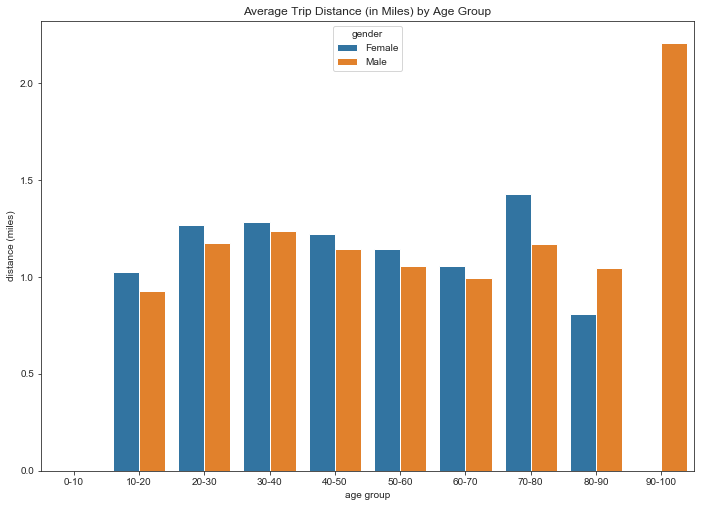

In [75]:
# plot avg trip distance by age group and gender
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

barp = sns.barplot('age group', 'distance', hue='gender', data=plotbins)
plt.ylabel('distance (miles)')
plt.title('Average Trip Distance (in Miles) by Age Group')

In [76]:
#create new dataframe to plot median trip speed by age group and gender
plotbins2 = new_data.groupby(['age group', 'gender'])['mph'].median().to_frame()
plotbins2.reset_index(inplace=True)

Text(0.5,1,'Median Trip Speed (in mph) by Age Group')

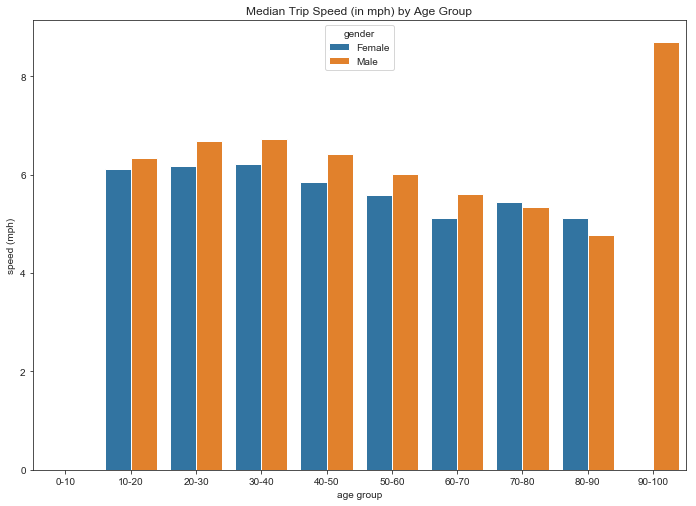

In [77]:
# plot median trip speed by age group and gender
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

barp = sns.barplot('age group', 'mph', hue='gender', data=plotbins2)
plt.ylabel('speed (mph)')
plt.title('Median Trip Speed (in mph) by Age Group')

In both charts, there is a significant increase in the average trip distance and median trip speed for the 90-100 year-old age bin. These results are scewed because of a much smaller sample size in that age bin. I'll show this a different way using Seaborn's lmplot to demonstrate lower confidence in the metrics for that 90-100 year-old age group.

In [78]:
#create a new dataframe with distance and mph metrics grouped by gender and age
lmplotdata = new_data.groupby(['age', 'gender'])['distance','mph'].agg(['mean','median','count']).reset_index()

In [79]:
lmplotdata.head(10)

age  gender  distance                       mph                
                     mean    median count      mean    median count
0  13.0  Female  0.881871  0.575251    16  6.247707  6.390799    16
1  13.0    Male  0.755980  0.507345    14  4.372860  4.495486    14
2  14.0  Female  1.278868  1.440936   182  5.674822  5.766029   182
3  15.0    Male  0.829380  0.627967    59  5.525192  6.086803    59
4  16.0  Female  0.761897  0.840042   129  3.571080  4.086128   129
5  16.0    Male  0.972581  0.762266   229  5.796552  6.319672   229
6  17.0  Female  1.029786  0.895441   679  5.663718  5.781800   679
7  17.0    Male  0.932560  0.772231   767  5.115690  5.451154   767
8  18.0  Female  1.197224  0.855251   989  6.519251  7.046076   989
9  18.0    Male  0.865526  0.617540  2716  6.428089  6.591303  2716

In [80]:
#flatten the multi-indexed columns
lmplotdata.columns = lmplotdata.columns.map('_'.join).str.strip('_')

In [81]:
lmplotdata.head(10)

,age,gender,distance_mean,distance_median,distance_count,mph_mean,mph_median,mph_count
0,13.0,Female,0.881871,0.575251,16,6.247707,6.390799,16
1,13.0,Male,0.755980,0.507345,14,4.372860,4.495486,14
2,14.0,Female,1.278868,1.440936,182,5.674822,5.766029,182
3,15.0,Male,0.829380,0.627967,59,5.525192,6.086803,59
4,16.0,Female,0.761897,0.840042,129,3.571080,4.086128,129
5,16.0,Male,0.972581,0.762266,229,5.796552,6.319672,229
6,17.0,Female,1.029786,0.895441,679,5.663718,5.781800,679
7,17.0,Male,0.932560,0.772231,767,5.115690,5.451154,767
8,18.0,Female,1.197224,0.855251,989,6.519251,7.046076,989
9,18.0,Male,0.865526,0.617540,2716,6.428089,6.591303,2716


/Users/lucas.mazzottiibm.com/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


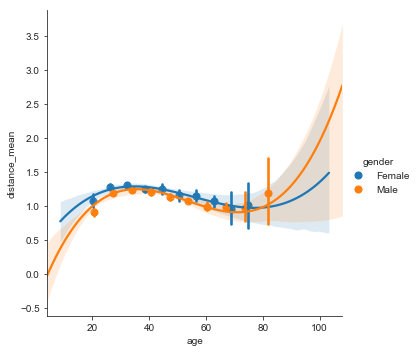

In [82]:
#create a new graph showing average trip distance grouped by age
ax = sns.lmplot(x = 'age', 
                y = 'distance_mean', 
                hue='gender', 
                x_bins = 10, #group age into 10 bins as before
                order = 3, #include a 3rd order polynomial regression to show trendline
                data = lmplotdata)

/Users/lucas.mazzottiibm.com/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


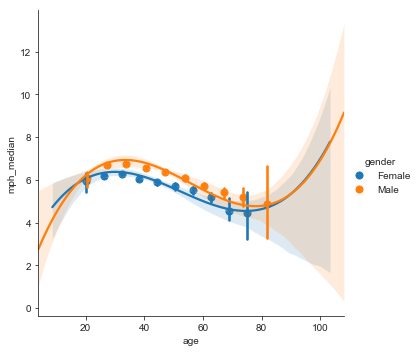

In [83]:
#create a new graph showing median trip speed grouped by age
bx = sns.lmplot(x = 'age', 
                y = 'mph_median', 
                hue='gender', 
                x_bins = 10, #group age into 10 bins as before
                order = 3, #include a 3rd order polynomial regression to show trendline
                data = lmplotdata)

The graphs above do a better job demonstrating the loss of confidence above age 70. 

Both versions of the graphs show that median trip speed and average trip distance are highest around the ~30-40 age group, and from there both decrease as riders get older. The graphs also show that female riders generally take slightly longer trips and male riders generally go slightly faster.

### 1.2.5 What is the busiest bike in Chicago in 2017? How many times was it used? How many minutes was it in use?

To answer this question we can include the Customer data as all rows in the original data contained information about trip duration and bike id. For that reason, I'll use the data2 dataframe which includes Customer ride information and does not have ages above 100 or below 5 removed

In [84]:
data2.head(10)

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age,from_s_city,from_s_latitude,from_s_longitude,from_s_dpcapacity,from_s_online_date,to_s_city,to_s_latitude,to_s_longitude,to_s_dpcapacity,to_s_online_date,distance,mph
0,13518905,3/31/2017 23:59:07,4/1/2017 00:13:24,5292,857,66,Clinton St & Lake St,171,May St & Cullerton St,Subscriber,Male,1989.0,28.0,Chicago,41.885637,-87.641823,23,6/25/2013 12:21:32,Chicago,41.855136,-87.654127,11,7/19/2013 11:05:15,2.199058,9.237584
1,13518904,3/31/2017 23:56:25,4/1/2017 00:00:21,4408,236,199,Wabash Ave & Grand Ave,26,McClurg Ct & Illinois St,Subscriber,Male,1990.0,27.0,Chicago,41.890912,-87.626804,15,8/8/2013 12:26:15,Chicago,41.891020,-87.617300,31,6/22/2013 20:28:13,0.488580,7.452916
2,13518903,3/31/2017 23:55:33,4/1/2017 00:01:21,696,348,520,Greenview Ave & Jarvis Ave,432,Clark St & Lunt Ave,Subscriber,Female,1979.0,38.0,Chicago,42.015962,-87.668570,23,5/24/2016 15:41:28,Chicago,42.009074,-87.674190,19,2/2/2015 11:32:22,0.556186,5.753647
3,13518902,3/31/2017 23:54:46,3/31/2017 23:59:34,4915,288,110,Dearborn St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1985.0,32.0,Chicago,41.893992,-87.629318,23,7/18/2013 16:46:48,Chicago,41.894503,-87.617854,31,7/18/2013 22:58:19,0.590296,7.378699
4,13518901,3/31/2017 23:53:33,4/1/2017 00:00:28,4247,415,327,Sheffield Ave & Webster Ave,331,Halsted St & Blackhawk St (*),Subscriber,Female,1989.0,28.0,Chicago,41.921540,-87.653818,19,9/23/2013 15:05:38,Chicago,41.908537,-87.648627,20,9/25/2013 13:55:21,0.936635,8.125031
5,13518900,3/31/2017 23:51:17,3/31/2017 23:55:19,3536,242,143,Sedgwick St & Webster Ave,289,Wells St & Concord Ln,Subscriber,Male,1988.0,29.0,Chicago,41.922167,-87.638888,15,7/19/2013 09:19:42,Chicago,41.912133,-87.634656,19,9/13/2013 09:46:47,0.726166,10.802468
6,13518899,3/31/2017 23:51:16,3/31/2017 23:57:17,5111,361,81,Daley Center Plaza,41,Federal St & Polk St,Subscriber,Male,1987.0,30.0,Chicago,41.884241,-87.629634,39,6/26/2013 19:02:13,Chicago,41.872078,-87.629544,19,6/25/2013 01:44:18,0.839891,8.375645
7,13518898,3/31/2017 23:50:26,3/31/2017 23:56:20,1579,354,56,Desplaines St & Kinzie St,77,Clinton St & Madison St,Subscriber,Male,1981.0,36.0,Chicago,41.888716,-87.644448,27,6/25/2013 11:50:53,Chicago,41.882242,-87.641066,31,6/26/2013 15:27:12,0.479646,4.877752
8,13518897,3/31/2017 23:50:25,3/31/2017 23:55:24,3914,299,210,Ashland Ave & Division St,69,Damen Ave & Pierce Ave,Subscriber,Male,1992.0,25.0,Chicago,41.903450,-87.667747,19,8/14/2013 16:30:43,Chicago,41.909396,-87.677692,19,6/25/2013 12:53:32,0.655557,7.892991
9,13518896,3/31/2017 23:49:58,4/1/2017 00:09:31,5455,1173,117,Wilton Ave & Belmont Ave,29,Noble St & Milwaukee Ave,Subscriber,Male,1989.0,28.0,Chicago,41.940180,-87.653040,23,7/18/2013 17:20:00,Chicago,41.900680,-87.662600,15,6/22/2013 20:52:28,2.771341,8.505395


In [85]:
#create a new dataframe that sums trip duration by bikeid
popbikes = data2.groupby(['bikeid'])['tripduration'].agg(['sum','count']).reset_index()

In [86]:
popbikes.head(10)

,bikeid,sum,count
0,1,567386,590
1,2,398120,415
2,3,389243,411
3,4,410474,394
4,5,448526,552
5,6,607084,572
6,7,581829,632
7,8,596869,644
8,9,528192,612
9,10,572027,617


In [87]:
#convert seconds to minutes
popbikes['sum'] = (popbikes['sum'] / 60).round(2)

In [88]:
#rename 'sum' and 'count' columns for readability
popbikes.rename(columns={'sum':'minutes', 'count':'no. of rides'}, inplace=True)

In [89]:
#sort the values in the new dataframe
popbikes.sort_values(by='minutes', ascending=False)

,bikeid,minutes,no. of rides
2451,2565,21817.88,1488
5656,5880,19023.98,1171
5400,5622,18648.55,1132
4638,4854,18445.20,1141
2957,3128,18024.08,1209
4697,4913,17820.37,1106
3131,3308,17662.63,1234
5243,5463,17551.83,1113
4689,4905,17417.35,1115
5198,5418,17405.75,1117


In [90]:
#get more information about the most popular bike
num1bike = data2[data2['bikeid'] == 2565]
num1bike.describe()

,trip_id,bikeid,tripduration,from_station_id,to_station_id,birthyear,age,from_s_latitude,from_s_longitude,from_s_dpcapacity,to_s_latitude,to_s_longitude,to_s_dpcapacity,distance,mph
count,1.488000e+03,1488.0,1488.000000,1488.000000,1488.000000,1252.000000,1252.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000,1488.000000
mean,1.538390e+07,2565.0,879.753360,197.798387,199.206989,1981.784345,35.215655,41.898902,-87.642564,22.167339,41.899008,-87.642669,22.070565,1.264321,5.871905
std,1.229636e+06,0.0,775.276889,140.554483,140.480117,11.265553,11.265553,0.045809,0.024506,8.649544,0.046000,0.024800,8.627523,1.007473,2.423451
min,1.298079e+07,2565.0,61.000000,2.000000,2.000000,1918.000000,17.000000,41.758670,-87.732002,0.000000,41.758670,-87.732002,0.000000,0.000000,0.000000
25%,1.426769e+07,2565.0,387.750000,76.000000,76.000000,1977.000000,27.000000,41.879255,-87.654691,15.000000,41.879255,-87.654966,15.000000,0.571232,4.497789
50%,1.522843e+07,2565.0,693.000000,176.000000,177.000000,1985.000000,32.000000,41.893882,-87.639833,19.000000,41.893992,-87.639833,19.000000,0.981530,6.074758
75%,1.645442e+07,2565.0,1168.500000,300.000000,300.000000,1990.000000,40.000000,41.925602,-87.626804,27.000000,41.925858,-87.626466,27.000000,1.648535,7.537491
max,1.751743e+07,2565.0,10610.000000,623.000000,623.000000,2000.000000,99.000000,42.063999,-87.576120,51.000000,42.063999,-87.565688,51.000000,10.687649,13.421018


**The most popular Divvy Bike in Chicago in 2017 was Bike 2565. It was ridden 1488 times for a total of 21817.88 minutes (almost 364 hours!). Its average rider was 35 years old and its average trip was about 14 minutes, 40 seconds long. It traveled at an average of 5.87 mph, covering a distance of 2,135 miles.**

## 1.3 Predictive Model

*Prompt: We need you to build a model that can predict how long a trip will take given a starting point and destination. You will need to get creative about the factors that will predict travel time. (Optional: find and use additional datasets that may have an impact on travel time, like weather and traffic).*

Let's revisit the dataset to decide how else the data must be massaged before being fed to any models. We'll start by using the new_data dataframe, which has rows with NaN values (~830,000) removed, excludes trips over 3 hours in duration, and excludes any ages below 5 or above 100.

Since our objective is to build a model that gives an accurate prediction for how long it will take to get from point A to point B, it makes sense to start with new_model which has complete information and extreme outliers removed.

We need to make a couple of key adjustments to build a good model. Since our goal is to predict the time it takes to get from point A to point B, we need to assume that the person is using the bike to get to their destination as quickly as possible. So we should remove any data where the 'mph' of the trip is not in line with the distance covered.

Let's refamiliarize ourselves with the dataset:

In [91]:
new_data.shape

(2990055, 26)

In [92]:

new_data.describe()

,trip_id,bikeid,tripduration,from_station_id,to_station_id,birthyear,age,from_s_latitude,from_s_longitude,from_s_dpcapacity,to_s_latitude,to_s_longitude,to_s_dpcapacity,distance,mph
count,2.990055e+06,2.990055e+06,2.990055e+06,2.990055e+06,2.990055e+06,2.990055e+06,2.990055e+06,2.990055e+06,2.990055e+06,2.990055e+06,2.990055e+06,2.990055e+06,2.990055e+06,2.990055e+06,2.990055e+06
mean,1.528671e+07,3.458739e+03,6.888937e+02,1.867538e+02,1.870008e+02,1.981598e+03,3.540173e+01,4.189982e+01,-8.764462e+01,2.233941e+01,4.190032e+01,-8.764489e+01,2.220274e+01,1.190783e+00,6.375499e+00
std,1.359140e+06,1.871176e+03,4.801631e+02,1.314166e+02,1.317027e+02,1.083664e+01,1.083664e+01,3.715833e-02,2.268870e-02,8.338893e+00,3.744539e-02,2.268936e-02,8.249757e+00,8.865435e-01,2.014107e+00
min,1.297923e+07,1.000000e+00,6.000000e+01,2.000000e+00,2.000000e+00,1.918000e+03,1.300000e+01,4.173665e+01,-8.780287e+01,0.000000e+00,4.173665e+01,-8.780287e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.407269e+07,1.831000e+03,3.560000e+02,7.700000e+01,7.700000e+01,1.976000e+03,2.700000e+01,4.188088e+01,-8.765506e+01,1.500000e+01,4.188088e+01,-8.765549e+01,1.500000e+01,5.681462e-01,5.216319e+00
50%,1.530489e+07,3.619000e+03,5.720000e+02,1.660000e+02,1.650000e+02,1.985000e+03,3.200000e+01,4.189186e+01,-8.764079e+01,1.900000e+01,4.189228e+01,-8.764107e+01,1.900000e+01,9.250439e-01,6.423628e+00
75%,1.650360e+07,5.111000e+03,9.070000e+02,2.830000e+02,2.830000e+02,1.990000e+03,4.100000e+01,4.191844e+01,-8.762963e+01,2.700000e+01,4.192077e+01,-8.762979e+01,2.700000e+01,1.550106e+00,7.673558e+00
max,1.753670e+07,6.471000e+03,1.079100e+04,6.260000e+02,6.260000e+02,2.004000e+03,9.900000e+01,4.206400e+01,-8.754939e+01,5.100000e+01,4.206400e+01,-8.754939e+01,5.100000e+01,1.696438e+01,1.125124e+02


The table below represents some initial thoughts of what we can do with the features in our dataset:

| Column Name | Data Type | Action |
| --- | --- | --- |
| trip_id | int64 | remove |
| start_time | object | convert to datetime |
| end_time | object | convert to datetime |
| bikeid | int64 | remove |
| tripduration | int64 | keep + normalize |
| from_station_id | int64 | remove |
| from_station_name | object | remove for now |
| to_station_id | int64 | remove |
| to_station_name | object | remove for now |
| usertype | object | remove as will only be looking at Subscriber data in this model |
| gender | object | keep + one-hot encode |
| birthyear | float64 | remove (redundant with age) |
| age | float64 | keep + normalize |
| from_s_city | object | remove as less than 1% of data outside of Chicago |
| from_s_latitude | float64 | remove as we cannot normalize this feature |
| from_s_longitude | float64 | remove as we cannot normalize this feature |
| from_s_dpcapacity | int64 | keep + normalize (why not?) |
| from_s_online_date | object | remove |
| to_s_city | object | remove as less than 1% of data outside of Chicago |
| to_s_latitude | float64 | remove as we cannot normalize this feature |
| to_s_longitude | float64 | remove as we cannot normalize this feature |
| to_s_dpcapacity | int64 | keep + normalize (why not?) |
| to_s_online_date | object | remove |
| distance | float64 | keep + normalize |
| mph | float64 | first use to determine outliers, then remove |
| age group | category | keep + one-hot encode |

Let's take a quick look at the correlations between our continuous variables and the target variable 'tripduration'

In [93]:
corr = new_data.corr()['tripduration']
corr.sort_values(ascending=False)

tripduration         1.000000
distance             0.728930
to_s_latitude        0.056320
to_station_id        0.046846
from_s_latitude      0.035603
from_station_id      0.034511
from_s_dpcapacity    0.018309
bikeid               0.013115
age                  0.006339
from_s_longitude     0.004654
birthyear           -0.006339
trip_id             -0.006511
to_s_longitude      -0.008210
to_s_dpcapacity     -0.010541
mph                 -0.108803
Name: tripduration, dtype: float64

For now, distance looks to be the most closely related to trip duration. Now, I'll plot this relationship:

In [94]:
import matplotlib.pyplot as plt

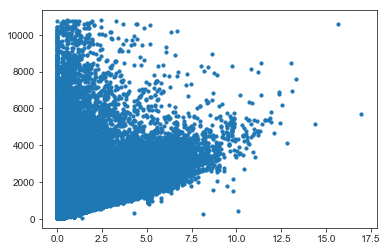

In [95]:
plt.scatter(new_data['distance'],new_data['tripduration'], s=10)
plt.show()

The plot above shows that there are a significant number of trips that have very long durations, sometimes hours or longer, to travel small distances. We need to correct this by removing this data before feeding it to the model.

Let's start by removing any trips that have durations longer than 1.5 hours. The vast majority of those trips (more than 5400 seconds) do not have distances that would indicate the rider is looking to get from point A to point B as fast as possible.

In [96]:
new_data = new_data[new_data['tripduration'] < 5400]

In [97]:
new_data.shape

(2988318, 26)

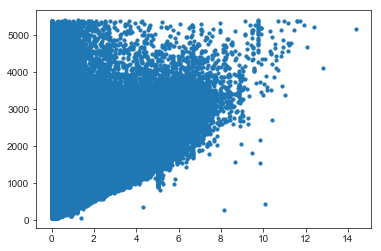

In [98]:
plt.scatter(new_data['distance'],new_data['tripduration'], s=10)
plt.show()

The relationship between distance and trip duration is beginning to make more sense, but there is still a large presence of trips that are not going from point A to point B efficiently. To further clean the data, I'll now remove any rows with 'mph' that falls outside of 1 standard deviation from the mean.

In [99]:
#import scipy stats
from scipy import stats

In [100]:
#count how many rows fall outside of one standard deviation of the mean 'mph'
(np.abs(stats.zscore(new_data['mph'])) > 1).sum()

825121

In [101]:
#remove this data from the dataset
new_data = new_data[(np.abs(stats.zscore(new_data['mph'])) < 1)]

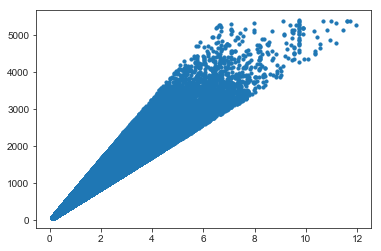

In [102]:
plt.scatter(new_data['distance'],new_data['tripduration'], s=10)
plt.show()

Although we have removed a significant percentage of the data (over 825,000 rows), it makes sense given the prompt of building a model that does a good job predicting travel time. The scatter plot above now shows a much clearer relationship between distance and trip duration. We still have over 2 million rows of data which should be plenty to work with.

In [103]:
new_data.shape

(2163197, 26)

In [104]:
new_data.dtypes

trip_id                  int64
start_time              object
end_time                object
bikeid                   int64
tripduration             int64
from_station_id          int64
from_station_name       object
to_station_id            int64
to_station_name         object
usertype                object
gender                  object
birthyear              float64
age                    float64
from_s_city             object
from_s_latitude        float64
from_s_longitude       float64
from_s_dpcapacity        int64
from_s_online_date      object
to_s_city               object
to_s_latitude          float64
to_s_longitude         float64
to_s_dpcapacity          int64
to_s_online_date        object
distance               float64
mph                    float64
age group             category
dtype: object

Before adding any additional features, let's build a quick Linear Regression model using just the continuous variables we already have and see where it lands

In [105]:
#import all the packages we'll need for building and validating models
from sklearn.model_selection import cross_val_score, KFold
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [106]:
first_model = new_data[['tripduration','distance','age','from_s_dpcapacity','to_s_dpcapacity']]

In [107]:
X = first_model.drop(['tripduration'], axis = 1)
y = first_model['tripduration']

In [108]:
X.head()

,distance,age,from_s_dpcapacity,to_s_dpcapacity
1,0.488580,27.0,15,31
2,0.556186,38.0,23,19
3,0.590296,32.0,23,31
4,0.936635,28.0,19,20
6,0.839891,30.0,39,19


In [109]:
y.head()

1    236
2    348
3    288
4    415
6    361
Name: tripduration, dtype: int64

In [110]:
#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [111]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.9136750899324487

We managed to get a r^2 score of 91% on our simple linear regression model... not bad! Let's see how a couple of other models perform.

In [112]:
lasso = linear_model.Lasso()
ridge = linear_model.Ridge()
dectree = DecisionTreeRegressor()


print(cross_val_score(lasso, X, y, cv=3))
print(cross_val_score(ridge, X, y, cv=3))
print(cross_val_score(dectree, X, y, cv=3))

[0.91379007 0.91261112 0.91385653]
[0.91381827 0.91259664 0.91387473]
[0.90194407 0.90004902 0.90303257]


Lasso and Ridge regression perform similarly to Linear Regression, and Decision Tree Regressor does slightly worse. Let's stick with linear regression for now and make the model more robust by including some additional features using weather data and our existing categorical variables.

For this next section I downloaded 2017 Chicago weather data from NOAA as a .csv file.

**import and merge weather data from NOAA**

In [113]:
pwd

'/Users/lucas.mazzottiibm.com/Box Sync/IBM - Box Sync/Training & Onboarding/DEVUP/DevUp2.1/Divvy Data'

In [114]:
#read in weather file downloaded from NOAA
wdata = pd.read_csv('1897957.csv')

In [115]:
wdata.shape

(40053, 22)

In [116]:
#check for missing data
wdata.isnull().sum()

STATION        0
NAME           0
DATE           0
AWND       38963
DAPR       39380
MDPR       39381
PRCP        1090
SNOW       16884
SNWD       31142
TAVG       39688
TMAX       36423
TMIN       36417
TOBS       37513
WT01       39631
WT02       40039
WT03       39772
WT04       40043
WT05       40038
WT06       40037
WT08       39916
WT09       40051
WT11       40040
dtype: int64

In [117]:
#keep only the rows of weather data that have average daily temperature information
wdata.dropna(subset=['TAVG'], inplace=True)

In [118]:
wdata.shape

(365, 22)

In [119]:
wdata.columns

Index(['STATION', 'NAME', 'DATE', 'AWND', 'DAPR', 'MDPR', 'PRCP', 'SNOW',
       'SNWD', 'TAVG', 'TMAX', 'TMIN', 'TOBS', 'WT01', 'WT02', 'WT03', 'WT04',
       'WT05', 'WT06', 'WT08', 'WT09', 'WT11'],
      dtype='object')

In [120]:
#get rid of irrelevant columns
wdata.drop(columns={'STATION','NAME','DAPR','MDPR', 'WT01', 'WT02', 'WT03', 'WT04', 
                    'WT05', 'WT06', 'WT08', 'WT09', 'WT11', 'TOBS'}, axis = 1, inplace=True)

In [121]:
wdata.dtypes

DATE     object
AWND    float64
PRCP    float64
SNOW    float64
SNWD    float64
TAVG    float64
TMAX    float64
TMIN    float64
dtype: object

In [122]:
#cast DATE as a datetime column - this will be the join key for merging the data back to our dataframe
wdata['DATE'] = wdata['DATE'].astype('datetime64[ns]')

After some cleaning, we have a dataframe 'wdata' that has daily information on wind ('AWND') precipitation ('PRCP','SNOW','SNWD') and temperature ('TAVG','TMAX','TMIN')


Now that we have our dataframe with weather information, we can join it to the rest of the data. But first, we'll need to change the 'start_time' column in new_data to datetime64 format so we can use it as a join key.

In [123]:
new_data['start_time'] = new_data['start_time'].astype('datetime64[ns]')

I'll also note here that the cell above takes almost as long to run as some of the more heavy lifting models later in the notebook. I'm not sure why this operation is so computationally expensive but would welcome any insight on this if there is a more efficient way of carrying out this operation.

In [124]:
#create a new column in the bike dataframe called 'join_date' which contains the day in which each trip started
new_data['join_date'] = new_data['start_time'].dt.normalize()

#ensure this column matches up with the weather column by normalizing date and renaming the 'Date' column 'join_date'
wdata['DATE'] = wdata['DATE'].dt.normalize()
wdata.rename(columns = {'DATE':'join_date'}, inplace=True)

In [125]:
#perform a left merge to associate weather data from a particular day with each bike trip
new_data = pd.merge(new_data, wdata, on='join_date', how='left')

In [126]:
new_data.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age,from_s_city,from_s_latitude,from_s_longitude,from_s_dpcapacity,from_s_online_date,to_s_city,to_s_latitude,to_s_longitude,to_s_dpcapacity,to_s_online_date,distance,mph,age group,join_date,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN
0,13518904,2017-03-31 23:56:25,4/1/2017 00:00:21,4408,236,199,Wabash Ave & Grand Ave,26,McClurg Ct & Illinois St,Subscriber,Male,1990.0,27.0,Chicago,41.890912,-87.626804,15,8/8/2013 12:26:15,Chicago,41.891020,-87.617300,31,6/22/2013 20:28:13,0.488580,7.452916,20-30,2017-03-31,14.54,0.02,0.0,0.0,39.0,44.0,36.0
1,13518903,2017-03-31 23:55:33,4/1/2017 00:01:21,696,348,520,Greenview Ave & Jarvis Ave,432,Clark St & Lunt Ave,Subscriber,Female,1979.0,38.0,Chicago,42.015962,-87.668570,23,5/24/2016 15:41:28,Chicago,42.009074,-87.674190,19,2/2/2015 11:32:22,0.556186,5.753647,30-40,2017-03-31,14.54,0.02,0.0,0.0,39.0,44.0,36.0
2,13518902,2017-03-31 23:54:46,3/31/2017 23:59:34,4915,288,110,Dearborn St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1985.0,32.0,Chicago,41.893992,-87.629318,23,7/18/2013 16:46:48,Chicago,41.894503,-87.617854,31,7/18/2013 22:58:19,0.590296,7.378699,30-40,2017-03-31,14.54,0.02,0.0,0.0,39.0,44.0,36.0
3,13518901,2017-03-31 23:53:33,4/1/2017 00:00:28,4247,415,327,Sheffield Ave & Webster Ave,331,Halsted St & Blackhawk St (*),Subscriber,Female,1989.0,28.0,Chicago,41.921540,-87.653818,19,9/23/2013 15:05:38,Chicago,41.908537,-87.648627,20,9/25/2013 13:55:21,0.936635,8.125031,20-30,2017-03-31,14.54,0.02,0.0,0.0,39.0,44.0,36.0
4,13518899,2017-03-31 23:51:16,3/31/2017 23:57:17,5111,361,81,Daley Center Plaza,41,Federal St & Polk St,Subscriber,Male,1987.0,30.0,Chicago,41.884241,-87.629634,39,6/26/2013 19:02:13,Chicago,41.872078,-87.629544,19,6/25/2013 01:44:18,0.839891,8.375645,20-30,2017-03-31,14.54,0.02,0.0,0.0,39.0,44.0,36.0


**create new features using start_time and categorical variables where applicable**

In [127]:
#create new features to indicate the month and day of week in which the trip started
new_data['start_day'] = new_data.start_time.dt.dayofweek #will return 0 for Monday aand 6 for Sunday for each row as new col
new_data['start_month'] = new_data.start_time.dt.month #will return a month 1-12 indicating the month of the year
new_data['start_hour'] = new_data.start_time.dt.hour #will return a month 1-12 indicating the month of the year

In [128]:
#write function to categorize the section of the day in which trips started
def timeofday(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return 'Noon'
    elif (x > 20) and (x <= 24):
        return 'Night'
    elif (x <= 4):
        return 'Late Night'

In [129]:
#apply the new function timeofday to the start_hour column of dataset
new_data['part_of_day'] = new_data['start_hour'].apply(timeofday)

In [130]:
new_data.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age,from_s_city,from_s_latitude,from_s_longitude,from_s_dpcapacity,from_s_online_date,to_s_city,to_s_latitude,to_s_longitude,to_s_dpcapacity,to_s_online_date,distance,mph,age group,join_date,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,start_day,start_month,start_hour,part_of_day
0,13518904,2017-03-31 23:56:25,4/1/2017 00:00:21,4408,236,199,Wabash Ave & Grand Ave,26,McClurg Ct & Illinois St,Subscriber,Male,1990.0,27.0,Chicago,41.890912,-87.626804,15,8/8/2013 12:26:15,Chicago,41.891020,-87.617300,31,6/22/2013 20:28:13,0.488580,7.452916,20-30,2017-03-31,14.54,0.02,0.0,0.0,39.0,44.0,36.0,4,3,23,Night
1,13518903,2017-03-31 23:55:33,4/1/2017 00:01:21,696,348,520,Greenview Ave & Jarvis Ave,432,Clark St & Lunt Ave,Subscriber,Female,1979.0,38.0,Chicago,42.015962,-87.668570,23,5/24/2016 15:41:28,Chicago,42.009074,-87.674190,19,2/2/2015 11:32:22,0.556186,5.753647,30-40,2017-03-31,14.54,0.02,0.0,0.0,39.0,44.0,36.0,4,3,23,Night
2,13518902,2017-03-31 23:54:46,3/31/2017 23:59:34,4915,288,110,Dearborn St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1985.0,32.0,Chicago,41.893992,-87.629318,23,7/18/2013 16:46:48,Chicago,41.894503,-87.617854,31,7/18/2013 22:58:19,0.590296,7.378699,30-40,2017-03-31,14.54,0.02,0.0,0.0,39.0,44.0,36.0,4,3,23,Night
3,13518901,2017-03-31 23:53:33,4/1/2017 00:00:28,4247,415,327,Sheffield Ave & Webster Ave,331,Halsted St & Blackhawk St (*),Subscriber,Female,1989.0,28.0,Chicago,41.921540,-87.653818,19,9/23/2013 15:05:38,Chicago,41.908537,-87.648627,20,9/25/2013 13:55:21,0.936635,8.125031,20-30,2017-03-31,14.54,0.02,0.0,0.0,39.0,44.0,36.0,4,3,23,Night
4,13518899,2017-03-31 23:51:16,3/31/2017 23:57:17,5111,361,81,Daley Center Plaza,41,Federal St & Polk St,Subscriber,Male,1987.0,30.0,Chicago,41.884241,-87.629634,39,6/26/2013 19:02:13,Chicago,41.872078,-87.629544,19,6/25/2013 01:44:18,0.839891,8.375645,20-30,2017-03-31,14.54,0.02,0.0,0.0,39.0,44.0,36.0,4,3,23,Night


Now let's drop the columns we don't need and one-hot encode the relevant categorical variables:

In [131]:
#first, create copy so we can return here if needed
updated_model = new_data.copy()

In [132]:
updated_model.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear', 'age',
       'from_s_city', 'from_s_latitude', 'from_s_longitude',
       'from_s_dpcapacity', 'from_s_online_date', 'to_s_city', 'to_s_latitude',
       'to_s_longitude', 'to_s_dpcapacity', 'to_s_online_date', 'distance',
       'mph', 'age group', 'join_date', 'AWND', 'PRCP', 'SNOW', 'SNWD', 'TAVG',
       'TMAX', 'TMIN', 'start_day', 'start_month', 'start_hour',
       'part_of_day'],
      dtype='object')

In [133]:
#drop columns we won't be using any more
updated_model.drop(['trip_id', #not needed
                    'start_time', #used to create other features, no longer needed
                    'end_time', #used to create other features, no longer needed
                    'bikeid', #not needed
                   'from_station_id', #not needed
                    'from_station_name', #could use in neural net in future, but drop for now
                    'to_station_id', #not needed
                   'to_station_name', #could use in neural net in future, but drop for now
                    'usertype', #remaining rows should be almost entirely Subscriber, so we can drop this
                    'birthyear', #not needed as we have 'age'
                   'from_s_city', #not needed as almost all trips are within Chicago
                    'from_s_latitude', #not needed
                    'from_s_longitude', #not needed
                    'from_s_online_date', #not needed
                    'to_s_city', #not needed as almost all trips within Chicago
                    'to_s_latitude', #not needed
                   'to_s_longitude', # not needed
                    'to_s_online_date', #not needed
                   'mph', #this is a distillation of 'tripduration' so we definitely want to exclude this
                    'age group', #not needed as we have 'age'
                    'join_date', #not needed
                    'start_hour'], #not needed as we used this to create part_of_day
                       axis=1, inplace=True) 

In [134]:
updated_model.head()

,tripduration,gender,age,from_s_dpcapacity,to_s_dpcapacity,distance,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,start_day,start_month,part_of_day
0,236,Male,27.0,15,31,0.488580,14.54,0.02,0.0,0.0,39.0,44.0,36.0,4,3,Night
1,348,Female,38.0,23,19,0.556186,14.54,0.02,0.0,0.0,39.0,44.0,36.0,4,3,Night
2,288,Male,32.0,23,31,0.590296,14.54,0.02,0.0,0.0,39.0,44.0,36.0,4,3,Night
3,415,Female,28.0,19,20,0.936635,14.54,0.02,0.0,0.0,39.0,44.0,36.0,4,3,Night
4,361,Male,30.0,39,19,0.839891,14.54,0.02,0.0,0.0,39.0,44.0,36.0,4,3,Night


Now one-hot encode dummy features based on categorical variables remaining

In [135]:
updated_model = pd.get_dummies(updated_model, columns=['gender','start_day', 'start_month', 'part_of_day'])

In [136]:
updated_model.head()

,tripduration,age,from_s_dpcapacity,to_s_dpcapacity,distance,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,gender_Female,gender_Male,start_day_0,start_day_1,start_day_2,start_day_3,start_day_4,start_day_5,start_day_6,start_month_1,start_month_2,start_month_3,start_month_4,start_month_5,start_month_6,start_month_7,start_month_8,start_month_9,start_month_10,start_month_11,start_month_12,part_of_day_Early Morning,part_of_day_Late Night,part_of_day_Morning,part_of_day_Night,part_of_day_Noon
0,236,27.0,15,31,0.488580,14.54,0.02,0.0,0.0,39.0,44.0,36.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,348,38.0,23,19,0.556186,14.54,0.02,0.0,0.0,39.0,44.0,36.0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,288,32.0,23,31,0.590296,14.54,0.02,0.0,0.0,39.0,44.0,36.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,415,28.0,19,20,0.936635,14.54,0.02,0.0,0.0,39.0,44.0,36.0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,361,30.0,39,19,0.839891,14.54,0.02,0.0,0.0,39.0,44.0,36.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


We just added a lot of features to this dataset. Let's take the temperature again with Linear Regression to see if the model has improved with the addition of these new features

In [137]:
X = updated_model.drop(['tripduration'], axis = 1)
y = updated_model['tripduration']

In [138]:
lr = linear_model.LinearRegression()
print(cross_val_score(lr, X, y, cv=3))

[0.91593875 0.91451944 0.91578635]


Looks like the model improved, but by less than 1%. So the effect of adding these new features was not pronounced. 

Next, let's try scaling the continuous features to see if this gives us better results. For this test, I'll use the RobustScaler from scikit learn since it is not as sensitive to outliers as some of the other scalers.

In [139]:
from sklearn.preprocessing import RobustScaler

In [140]:
#feed the X data to the scaler with our numerical columns
transformer = RobustScaler().fit(X[['age','from_s_dpcapacity','to_s_dpcapacity','distance',
                                   'AWND','PRCP','SNOW','SNWD','TAVG','TMAX','TMIN']])

In [141]:
#create new transformed dataframe with numerical columns
scaledframe = transformer.transform(X[['age','from_s_dpcapacity','to_s_dpcapacity','distance',
                                      'AWND','PRCP','SNOW','SNWD','TAVG','TMAX','TMIN']])
scaledframe = pd.DataFrame(scaledframe, columns = ['age','from_s_dpcapacity','to_s_dpcapacity','distance',
                                                  'AWND','PRCP','SNOW','SNWD','TAVG','TMAX','TMIN'])

In [142]:
scaledframe.isna().sum()

age                  0
from_s_dpcapacity    0
to_s_dpcapacity      0
distance             0
AWND                 0
PRCP                 0
SNOW                 0
SNWD                 0
TAVG                 0
TMAX                 0
TMIN                 0
dtype: int64

In [143]:
#put the scaled values back into the X dataframe
X['age'] = scaledframe['age'].values
X['from_s_dpcapacity'] = scaledframe['from_s_dpcapacity'].values
X['to_s_dpcapacity'] = scaledframe['to_s_dpcapacity'].values
X['distance'] = scaledframe['distance'].values
X['AWND'] = scaledframe['AWND'].values
X['PRCP'] = scaledframe['PRCP'].values
X['SNOW'] = scaledframe['SNOW'].values
X['SNWD'] = scaledframe['SNWD'].values
X['TAVG'] = scaledframe['TAVG'].values
X['TMAX'] = scaledframe['TMAX'].values
X['TMIN'] = scaledframe['TMIN'].values

In [144]:
X.head()

,age,from_s_dpcapacity,to_s_dpcapacity,distance,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,gender_Female,gender_Male,start_day_0,start_day_1,start_day_2,start_day_3,start_day_4,start_day_5,start_day_6,start_month_1,start_month_2,start_month_3,start_month_4,start_month_5,start_month_6,start_month_7,start_month_8,start_month_9,start_month_10,start_month_11,start_month_12,part_of_day_Early Morning,part_of_day_Late Night,part_of_day_Morning,part_of_day_Night,part_of_day_Noon
0,-0.357143,-0.333333,1.000000,-0.492814,1.085437,1.0,0.0,0.0,-1.04,-1.291667,-0.782609,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0.428571,0.333333,0.000000,-0.417210,1.085437,1.0,0.0,0.0,-1.04,-1.291667,-0.782609,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0.000000,0.333333,1.000000,-0.379065,1.085437,1.0,0.0,0.0,-1.04,-1.291667,-0.782609,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,-0.285714,0.000000,0.083333,0.008245,1.085437,1.0,0.0,0.0,-1.04,-1.291667,-0.782609,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,-0.142857,1.666667,0.000000,-0.099944,1.085437,1.0,0.0,0.0,-1.04,-1.291667,-0.782609,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


Let's test our Linear Regression model again now to see if feature scaling made a difference.

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [146]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
regr.score(X_test, y_test)

0.9158279789300128

The feature scaling also did not seem to make much of a difference in the r^2 score of the model.

But for kicks, let's give it one more shot with a Random Forest Regressor and then take a look at the feature importances:

In [147]:
rf = RandomForestRegressor(n_estimators = 10, random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [148]:
print('R^2 Training Score: {:.2f} \nR^2 Testing Score: {:.2f}'.format(rf.score(X_train, y_train), rf.score(X_test, y_test)))

R^2 Training Score: 0.99 
R^2 Testing Score: 0.93


Feature ranking:
1. feature 3 (0.933595)
2. feature 0 (0.012920)
3. feature 4 (0.006945)
4. feature 1 (0.005738)
5. feature 2 (0.005703)
6. feature 9 (0.005434)
7. feature 10 (0.004976)
8. feature 8 (0.004338)
9. feature 5 (0.002433)
10. feature 36 (0.001557)
11. feature 34 (0.001290)
12. feature 32 (0.001267)
13. feature 18 (0.000918)
14. feature 19 (0.000804)
15. feature 35 (0.000771)
16. feature 14 (0.000754)
17. feature 15 (0.000742)
18. feature 17 (0.000734)
19. feature 25 (0.000728)
20. feature 28 (0.000726)
21. feature 27 (0.000720)
22. feature 13 (0.000715)
23. feature 16 (0.000701)
24. feature 26 (0.000680)
25. feature 12 (0.000674)
26. feature 24 (0.000661)
27. feature 11 (0.000651)
28. feature 29 (0.000631)
29. feature 23 (0.000502)
30. feature 21 (0.000315)
31. feature 30 (0.000292)
32. feature 33 (0.000287)
33. feature 22 (0.000250)
34. feature 31 (0.000203)
35. feature 20 (0.000171)
36. feature 6 (0.000102)
37. feature 7 (0.000071)


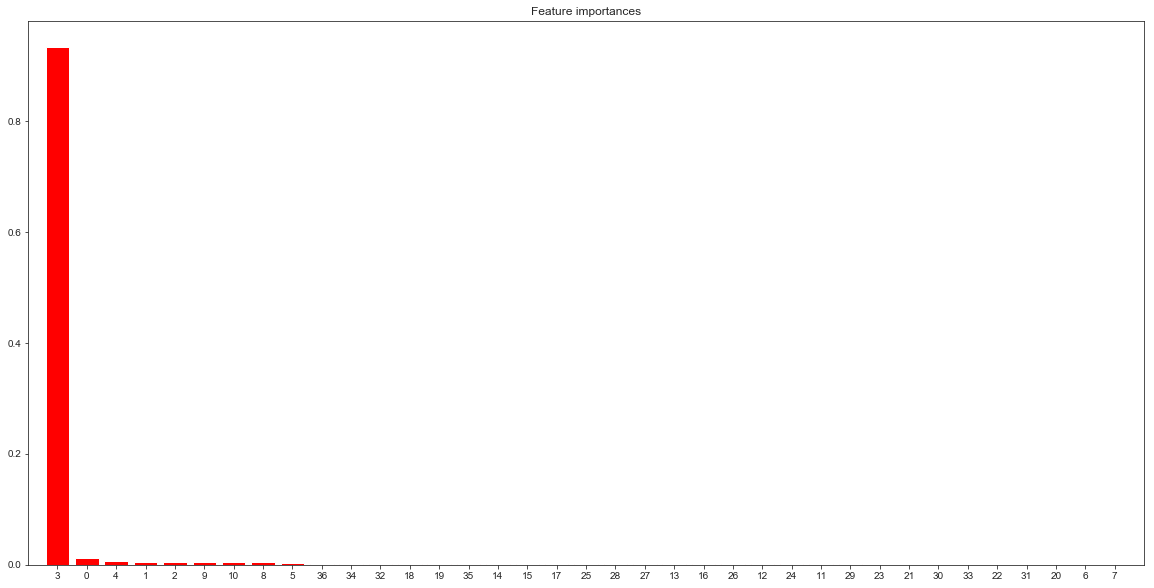

In [149]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

The random forest managed to score a 93%, which is the best we've seen any model perform so far. The feature importances indicate that distance is by far the most important feature in predicting the trip duration, with much smaller effects coming from age, the capacity of the start and end stations, wind, and temperature. Although I'm suprised factors like age and weather don't seem to matter that much, it seems fairly intuitive that distance would be the most important factor.

From the yellowbrick documentation: Below is a plot showing the predicted values versus the residuals. The points seem to be distributed fairly randomly around the horizontal axis, and we can also see from the histogram that our error is normally distributed around zero, which also generally indicates a well fitted model.

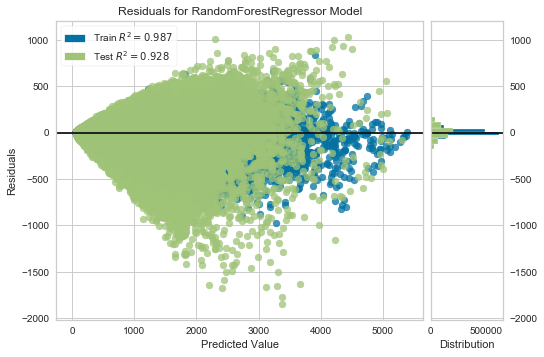

In [151]:
from yellowbrick.regressor import ResidualsPlot

visualizer=ResidualsPlot(rf)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

To improve the model in future iterations I'd like to try using xgboost or neural networks with vectorized features. 